# Import and Data Wrangling

In [373]:
#import all necessary modules

import matplotlib.pyplot as plt
import collections
from collections import Counter
import numpy as np
import pandas as pd
import array as arr
import statistics as st
import scipy.stats as stats
from matplotlib import path
from collections import OrderedDict, defaultdict 
%matplotlib inline 

In [374]:
#Read the lunar and solar eclipse csv files
#NAN values replace '-'

lunar_file = pd.read_csv('/Users/rachelraikar/Desktop/Spring/Spring-notes/solar-eclipses/lunar.csv',index_col='Catalog Number',na_values='-')
solar_file = pd.read_csv('/Users/rachelraikar/Desktop/Spring/Spring-notes/solar-eclipses/solar.csv',index_col='Catalog Number',na_values='-')
                   

In [375]:
# Create a separate dataframes with the columns needed for analysis

lunar = lunar_file[['Calendar Date', 'Eclipse Time', 'Delta T (s)','Eclipse Type', 'Latitude', 'Longitude',
       'Penumbral Eclipse Duration (m)', 'Partial Eclipse Duration (m)','Total Eclipse Duration (m)']]
solar = solar_file[['Calendar Date', 'Eclipse Time', 'Delta T (s)', 'Eclipse Type','Eclipse Magnitude',
       'Latitude', 'Longitude', 'Sun Altitude', 'Sun Azimuth',
       'Path Width (km)', 'Central Duration']]

In [376]:
#create names to easily look at df heads while editing data
sh = solar.head()
lh = lunar.head()

In [377]:
#display lunar dataframe for reference
lh

,Calendar Date,Eclipse Time,Delta T (s),Eclipse Type,Latitude,Longitude,Penumbral Eclipse Duration (m),Partial Eclipse Duration (m),Total Eclipse Duration (m)
Catalog Number,,,,,,,,,
1,-1999 June 26,14:13:28,46437,N,24S,22W,268.8,NaN,NaN
2,-1999 November 21,20:23:49,46427,N,15N,98W,233.4,NaN,NaN
3,-1998 May 17,05:47:36,46416,P,13S,89E,281.7,102.7,NaN
4,-1998 November 11,05:15:58,46404,P,12N,113E,343.4,200.8,NaN
5,-1997 May 6,18:57:01,46392,T+,11S,92W,322.8,213.5,98.2


In [378]:
#display solar dataframe for reference
sh

,Calendar Date,Eclipse Time,Delta T (s),Eclipse Type,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
Catalog Number,,,,,,,,,,,
1,-1999 June 12,03:14:51,46438,T,1.0733,6.0N,33.3W,74,344,247.0,06m37s
2,-1999 December 5,23:45:23,46426,A,0.9382,32.9S,10.8E,76,21,236.0,06m44s
3,-1998 June 1,18:09:16,46415,T,1.0284,46.2N,83.4E,60,151,111.0,02m15s
4,-1998 November 25,05:57:03,46403,A,0.9806,67.8S,143.8W,25,74,162.0,01m14s
5,-1997 April 22,13:19:56,46393,P,0.1611,60.6S,106.4W,0,281,NaN,NaN


In [379]:
#['Calendar Date'] ->Solar and lunar eclipses during the five millennium period -1999 to +3000 (2000 BCE to 3000 CE).

#splitting the column 'Calendar Date' into a list of month, day, year for convenience
solar_dates = []
for date in solar['Calendar Date']:
    date = date.split()
    date[0] = int(date[0])
    date[2] = int(date[2])
    solar_dates.append(date)

lunar_dates = []
for date in lunar['Calendar Date']:
    date = date.split()
    date[0] = int(date[0])
    date[2] = int(date[2])
    lunar_dates.append(date)

#Replace the column in dataframe with the date list for each row : [year,month,day]
solar['Calendar Date'] = solar_dates
lunar['Calendar Date'] = lunar_dates


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Exploratory Data Analysis (EDA) : Data Storytelling/ Trend Analysis

Questions Asked:

1. Which eclipse is more common?
    - How many solar/lunar eclipses occur on average every year?
    
    
2. Is there a monthly trend for when solar/lunar eclipses occur?
    - Is it different for solar vs lunar eclipses?
    - If so why are they more/less common during certain months?
    
    
3. What months are total eclipses more common?
    - Does it differ for solar/lunar eclipses?
      

## Which eclipse is more common? How many solar/lunar eclipses per year on average?

There seem to be 166 more lunar eclipses than solar eclipses. After further investigation, it was found that on average solar and lunar eclipses had around 2 eclipses a year. There was no significant difference with solar eclipses (~2.3796/yr) and lunar eclipses (~2.4128/yr). But since this is over a 5 millennium period, the small difference can be seen affecting the total number of eclipses, that is that there have been more lunar than solar eclipses over this time frame 2000 BCE to 3000 CE.

In [380]:
print('Number of lunar eclipses in 5 milleniums = ', len(lunar))
print('Number of solar eclipses in 5 milleniums = ', len(solar))

print('Difference between solar and lunar eclipses = ', len(lunar) - len(solar))

Number of lunar eclipses in 5 milleniums =  12064
Number of solar eclipses in 5 milleniums =  11898
Difference between solar and lunar eclipses =  166


In [381]:
#extracting just the years into lists
solar_year = [date[0] for date in solar_dates]
lunar_year = [date[0] for date in lunar_dates]

#Make a dictionary of years and counts for solar and lunar eclipses
solar_year_count = dict(Counter(solar_year))
lunar_year_count = dict(Counter(lunar_year))

#convert the value counts to list to perform operations
solaryearvalues = list(solar_year_count.values())
lunaryearvalues = list(lunar_year_count.values())

#calculate and print the mean number of eclipses per year
print('Mean solar eclipses per year = ', np.mean(solaryearvalues))
print('Mean lunar eclipses per year = ', np.mean(lunaryearvalues))

Mean solar eclipses per year =  2.3796
Mean lunar eclipses per year =  2.4128


## Is there a monthly trend for when solar/lunar eclipses occur?
- Is it different for solar vs lunar eclipses?

    Solar and lunar eclipses seem to have relatively the same trend with every month as observed using data analysis plots.


- If so why are they more/less common during certain months?

    The trend seems directly correlated to how many days are in the month. More days in a month means more probability of an eclipse occurring during that month. That is why February seems to have the lowest number of eclipses since the month has the least number of days regardless of whether it is a leap year.

In [382]:
#extracting just the months into lists
solar_months = [date[1] for date in solar_dates]
lunar_months = [date[1] for date in lunar_dates]

#Make a dictionary of {month:counts} for solar and lunar eclipses
solar_months_count = dict(Counter(solar_months))
lunar_months_count = dict(Counter(lunar_months))

#Make dataframes for better visual table analysis
solar_months_df = pd.DataFrame.from_dict(solar_months_count, orient='index',columns=['Solar Month Count'])
lunar_months_df = pd.DataFrame.from_dict(lunar_months_count, orient='index',columns=['Lunar Month Count'])

#print the counts for observation
print(solar_months_df)
print(lunar_months_df)

           Solar Month Count
June                     973
December                1014
November                 977
April                    981
May                     1009
October                 1008
March                   1009
September                982
February                 919
August                  1008
January                 1010
July                    1008
           Lunar Month Count
June                     992
November                 994
May                     1025
October                 1022
April                    986
March                   1028
September                990
August                  1015
February                 936
January                 1027
December                1024
July                    1025


In [383]:
#defined a list of the months in order
months = ['January', 'February', 'March','April','May','June','July','August','September','October','November','December']

#create an ordered dictionary that reorders the previous dictionaries based on month list
solar_months_ordered = OrderedDict(sorted(solar_months_count.items(),key =lambda x:months.index(x[0])))
lunar_months_ordered = OrderedDict(sorted(lunar_months_count.items(),key =lambda x:months.index(x[0])))

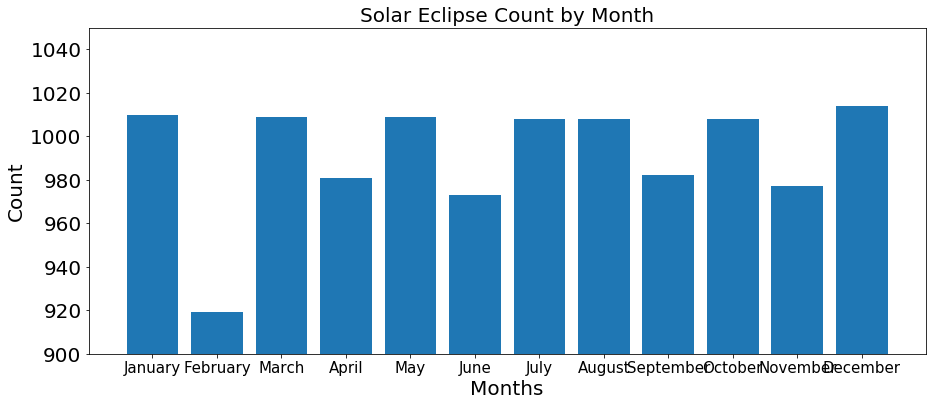

In [384]:
#Plot the counts of solar eclipses for months 
_ = plt.figure(figsize=(15,6))

_ = plt.bar(solar_months_ordered.keys(), solar_months_ordered.values())
_ = plt.ylim(900,1050)
_ = plt.rcParams['xtick.labelsize']=11
_ = plt.rcParams['ytick.labelsize']=12
_ = plt.xlabel('Months',size=20)
_ = plt.ylabel('Count',size=20)
_ = plt.title('Solar Eclipse Count by Month',size=20)
_ = plt.savefig('SolarMonthCount.png')
_ = plt.show() 

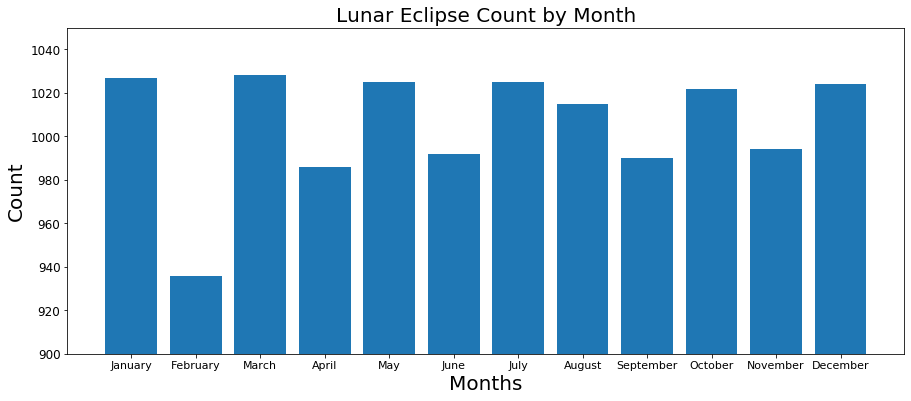

In [385]:
#Plot the counts of lunar eclipses for months 
_ = plt.figure(figsize=(15,6))

_ = plt.bar(lunar_months_ordered.keys(), lunar_months_ordered.values())
_ = plt.ylim(900,1050)
_ = plt.rcParams['xtick.labelsize']=11
_ = plt.rcParams['ytick.labelsize']=12
_ = plt.xlabel('Months',size=20)
_ = plt.ylabel('Count',size=20)
_ = plt.title('Lunar Eclipse Count by Month',size=20)
_ = plt.savefig('LunarMonthCount.png')
_ = plt.show() 

## What months are total eclipses more common?

Since there are many types of eclipses, I want to focus on one type of eclipse. I will be focusing on a total eclipse for both lunar and solar eclipses. A total solar eclipse is characterized by the moon completely covering the sun in the sky. A total lunar eclipse is when the Earth's shadow completely covers the moon.

After analysis, I first found that there have been a few hundred more total lunar eclipses than solar eclipses in the past 5 millenniums. This implies that total lunar eclipses are more common.

- Does the trend differ between lunar and solar eclipses?

    Total lunar eclipses seemed the follow the monthly trend that was seen earlier, where the number of eclipses was directly related to the number of days.

    Total solar eclipses, however, seem to veer off this trend greatly. They seem to be more common during the second half of the year during the season's Fall and Winter (September - January). This will be an area of further study using statistical testing to test whether month plays a role in the probability of a solar eclipse occurring.

In [386]:
#make a empty list of total solar eclipses
solar_type = []

#if the 'Eclipse Type' column has T, then append to the list
for i in solar['Eclipse Type']:
    if i is 'T':
        solar_type.append([i])

#see how many total solar eclipses
print('Number of total solar eclipses =', len(solar_type))

Number of total solar eclipses = 3049


In [387]:
#make an empty list of total eclipses
lunar_type = []

#if the value is not NaN in 'Total Eclipse Duration' then append to the new list
for i in lunar['Total Eclipse Duration (m)']:
    if str(i) != 'nan':
        lunar_type.append([i])

#see how many total lunar eclipses
print('Number of total lunar eclipses =',len(lunar_type))

Number of total lunar eclipses = 3479


In [388]:
#Create df with columns needed for analysis
solar_type = solar[['Calendar Date','Eclipse Type']]
lunar_type = lunar[['Calendar Date','Total Eclipse Duration (m)']]

In [389]:
#create df of solar eclipses with only total eclipses by keeping rows with 'T' in the column 'Eclipse Type'
total_solar = solar.loc[solar['Eclipse Type'] == 'T']

#double check length to be the same as number of total solar eclipses
print(len(total_solar))
print(len(solar_type))

3049
11898


In [390]:
#print the df head for visual analysis 
total_solar.head(3)

,Calendar Date,Eclipse Time,Delta T (s),Eclipse Type,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
Catalog Number,,,,,,,,,,,
1,"[-1999, June, 12]",03:14:51,46438,T,1.0733,6.0N,33.3W,74,344,247.0,06m37s
3,"[-1998, June, 1]",18:09:16,46415,T,1.0284,46.2N,83.4E,60,151,111.0,02m15s
10,"[-1996, October, 4]",23:23:37,46358,T,1.0257,28.8N,38.6E,59,214,101.0,02m04s


In [391]:
#create df of lunar eclipses with only total eclipses by dropping rows that have Nans in the column
    #'Total Eclipse Duration (m)'

total_lunar = lunar.dropna(subset=['Total Eclipse Duration (m)'])

#double check length to be the same as number of total solar eclipses
print(len(total_lunar))
print(len(lunar_type))

3479
12064


In [392]:
#print the df head for visual analysis 
total_lunar.head(3)

,Calendar Date,Eclipse Time,Delta T (s),Eclipse Type,Latitude,Longitude,Penumbral Eclipse Duration (m),Partial Eclipse Duration (m),Total Eclipse Duration (m)
Catalog Number,,,,,,,,,
5,"[-1997, May, 6]",18:57:01,46392,T+,11S,92W,322.8,213.5,98.2
6,"[-1997, October, 31]",06:54:09,46380,T+,9N,88E,374.4,228.7,90.6
15,"[-1993, February, 23]",02:59:48,46300,T-,16N,153E,371.8,228.2,87.7


In [393]:
#create a dictionary using a counter for the months where the total lunar eclipses occur
total_lunar_months = dict(Counter([date[1] for date in total_lunar['Calendar Date']]))

In [394]:
#print dict for analysis
total_lunar_months

{'May': 297,
 'October': 290,
 'February': 260,
 'August': 299,
 'December': 290,
 'June': 294,
 'April': 290,
 'September': 285,
 'January': 296,
 'July': 301,
 'November': 286,
 'March': 291}

In [395]:
#create a dictionary using a counter for the months where the total solar eclipses occur
total_solar_months = dict(Counter([date[1] for date in total_solar['Calendar Date']]))

In [396]:
#print dict for analysis
total_solar_months

{'June': 295,
 'October': 225,
 'March': 274,
 'January': 220,
 'July': 297,
 'November': 203,
 'February': 216,
 'April': 283,
 'August': 287,
 'December': 213,
 'May': 296,
 'September': 240}

In [397]:
#create an ordered dictionary that reorders the previous dictionaries based on month list
total_solar_months_ordered = OrderedDict(sorted(total_solar_months.items(),key =lambda x:months.index(x[0])))
total_lunar_months_ordered = OrderedDict(sorted(total_lunar_months.items(),key =lambda x:months.index(x[0])))

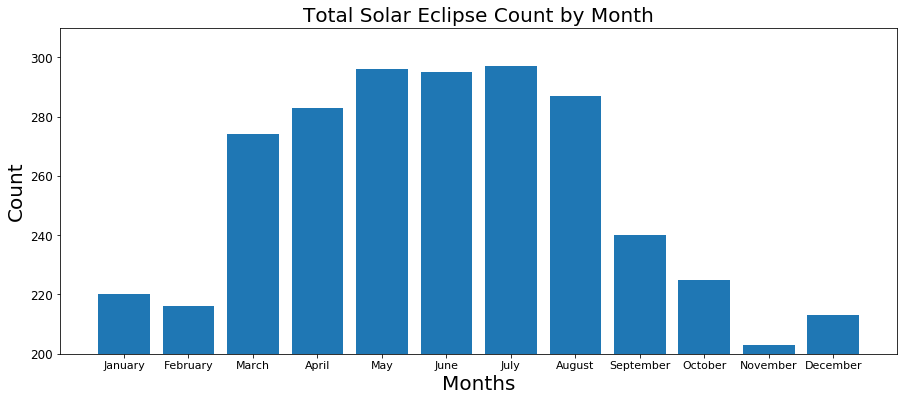

In [398]:
#Plot the counts of solar eclipses for months in order
_ = plt.figure(figsize=(15,6))

_ = plt.bar(total_solar_months_ordered.keys(), total_solar_months_ordered.values())
_ = plt.ylim(200,310)
_ = plt.rcParams['xtick.labelsize']=11
_ = plt.rcParams['ytick.labelsize']=12
_ = plt.xlabel('Months',size=20)
_ = plt.ylabel('Count',size=20)
_ = plt.title('Total Solar Eclipse Count by Month',size=20)
_ = plt.savefig('TotalSolarCount.png')
_ = plt.show() 

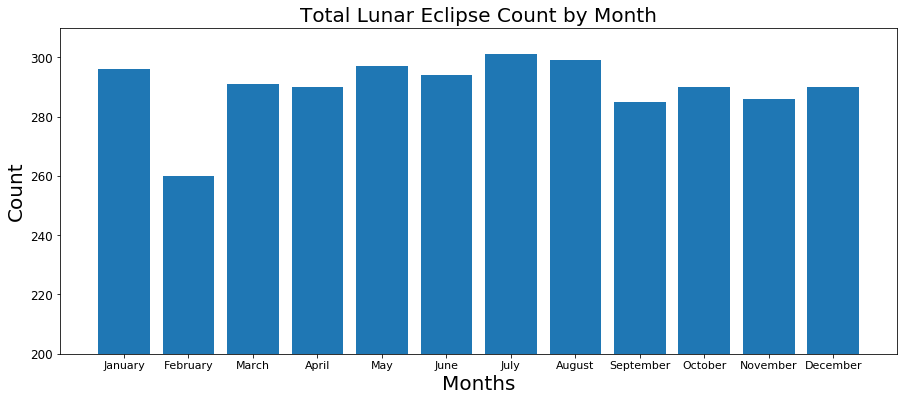

In [399]:
#Plot the counts of lunar eclipses for months in order
_ = plt.figure(figsize=(15,6))

_ = plt.bar(total_lunar_months_ordered.keys(), total_lunar_months_ordered.values())
_ = plt.ylim(200,310)
_ = plt.rcParams['xtick.labelsize']=11
_ = plt.rcParams['ytick.labelsize']=12
_ = plt.xlabel('Months',size=20)
_ = plt.ylabel('Count',size=20)
_ = plt.title('Total Lunar Eclipse Count by Month',size=20)
_ = plt.savefig('TotalLunarCount.png')
_ = plt.show()

# Exploratory Data Analysis (EDA): Statistical Analysis Part 1 

## Solar Eclipses

In [400]:
#group 1: fall-winter [septemeber -> february], group 2: spring-summer [march -> august]
group1_months = ['September', 'October', 'November', 'December', 'January', 'February']
group2_months = ['March', 'April', 'May', 'June', 'July', 'August']

#Create dictionaries of group 1 and group 2 data 
group1_total_solar_eclipse_dict = defaultdict(int)
group2_total_solar_eclipse_dict = defaultdict(int)


#Iterate over solar eclipse df and create dictionaries for each group: 
for ind, row in solar.iterrows():
   
    # create the key to be the year, month of the date the eclipse occured
    year, month = row['Calendar Date'][0], row['Calendar Date'][1]
    dict_key = (year, month)
    
    #append values dictionary for group 1: total eclipse is 1 else 0
    if month in group1_months:
        if row['Eclipse Type'] == 'T':
            group1_total_solar_eclipse_dict[dict_key] += 1
        else:
            group1_total_solar_eclipse_dict[dict_key] += 0
            
    #append values dictionary for group 2: total eclipse is 1 else 0
    else:
        if row['Eclipse Type'] == 'T':
            group2_total_solar_eclipse_dict[dict_key] += 1
        else:
            group2_total_solar_eclipse_dict[dict_key] += 0


In [401]:
#length of group 1 and 2 (sample size: n)
solar_n1 = len(group1_total_solar_eclipse_dict.values())
solar_n2 = len(group2_total_solar_eclipse_dict.values())

#probability of total eclipse in group 1 and 2: p1 and p2
solar_p1 = float(sum(group1_total_solar_eclipse_dict.values()) / solar_n1)
solar_p2 = float(sum(group2_total_solar_eclipse_dict.values()) / solar_n2)

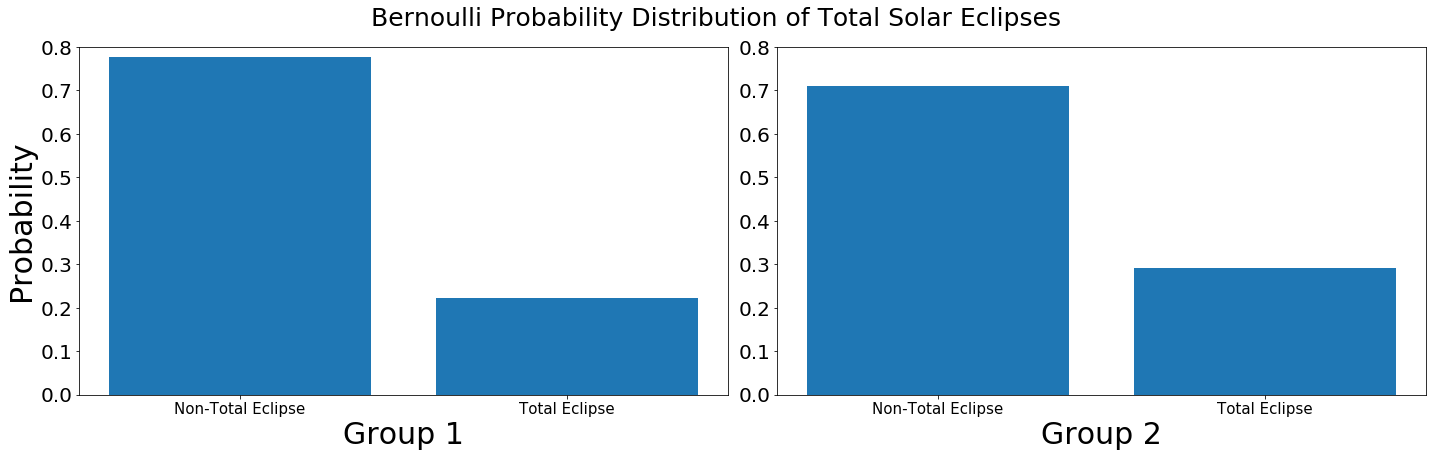

In [410]:
_ = plt.rcParams['figure.figsize'] = 20,6 

#Plot on the left
_ = plt.subplot(1, 2, 1)
_ = plt.bar(['Non-Total Eclipse', 'Total Eclipse'], [1-solar_p1,solar_p1])
_ = plt.xlabel('Group 1', size=30)
_ = plt.ylabel('Probability',size=30)
_ = plt.ylim(0,0.8)

#plot on the right
_ = plt.subplot(1, 2, 2)
_ = plt.bar(['Non-Total Eclipse', 'Total Eclipse'], [1-solar_p2,solar_p2])
_ = plt.xlabel('Group 2',size=30 )
_ = plt.ylim(0,0.8)

#edits the sizing of both plots
_ = plt.tight_layout()
_ = plt.rcParams['xtick.labelsize']=15
_ = plt.rcParams['ytick.labelsize']=20
_ = plt.suptitle('Bernoulli Probability Distribution of Total Solar Eclipses',size = 25,y=1.05)
_ = plt.savefig('TotalSolar.png')
_ = plt.show()

In [403]:
#compute the standard deviations of each group 
solar_sigma1 = np.sqrt(solar_p1 * (1-solar_p1) / solar_n1)
solar_sigma2 = np.sqrt(solar_p2 * (1-solar_p2) / solar_n2)

#calculate the standard deviation difference 
solar_sigma_diff = np.sqrt((solar_sigma1**2) + (solar_sigma2**2))

#for 95% confidence interval, we use the critical Z-value of 1.96
z_value = 1.96

#calculate the margin of error for frequential test: critical z-value * std
margin_error = z_value * solar_sigma_diff
print ('margin of error = ', margin_error)

#Find a confidence interval of 95% for frequential test: mean +/- margin or error
conf_interval = np.array([-1, +1]) * margin_error
print('confidence interval = ',conf_interval)

#Print actual proportion difference
solar_p1_p2 = solar_p1-solar_p2
print ('p_1 - p_2 = ', solar_p1_p2)

margin of error =  0.01568255159230949
confidence interval =  [-0.01568255  0.01568255]
p_1 - p_2 =  -0.06719435763444165


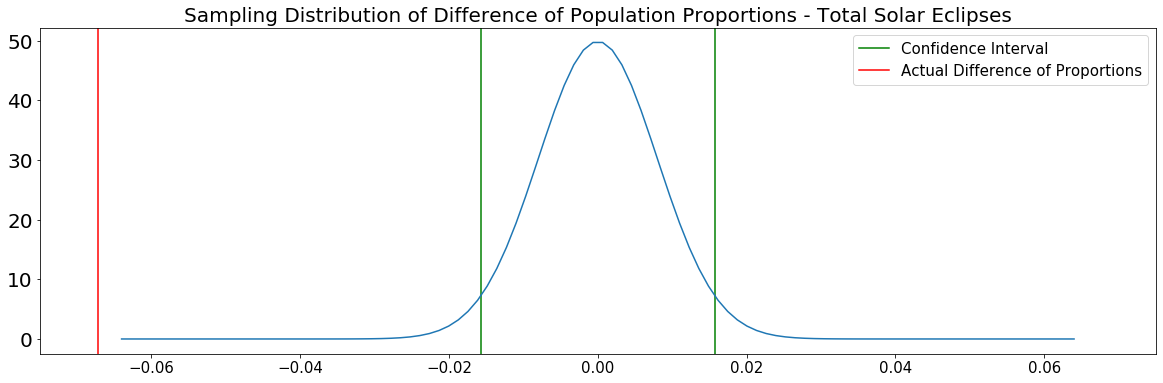

In [404]:
#create a plot displaying the sampling distribution for visual analysis
x= np.linspace(0-8*solar_sigma_diff, 0+8*solar_sigma_diff,100)
plt.axvline(x=solar_distance, color='g', label ='Confidence Interval')
plt.axvline(x=-solar_distance,color='g')
plt.axvline(x=solar_p1 - solar_p2,color='r',label='Actual Difference of Proportions')
plt.plot(x,stats.norm.pdf(x,0,solar_sigma_diff))
plt.xlim(-0.075,0.075)
plt.title('Sampling Distribution of Difference of Population Proportions - Total Solar Eclipses',size=20)
plt.legend(fontsize=15)
plt.savefig('SolarDist.png')
plt.show()

As seen above, the actual difference in proportions is outside the confidence interval range. Therefore we can reject the null hypothesis which states that the total solar eclipse has the same probability of occuring in both month groups.

## Lunar Eclipses

In [405]:
#group 1: fall-winter [septemeber -> february], group 2: spring-summer [march -> august]
group1_months = ['September', 'October', 'November', 'December', 'January', 'February']
group2_months = ['March', 'April', 'May', 'June', 'July', 'August']

#Create dictionaries of group 1 and group 2 data 
group1_total_lunar_eclipse_dict = defaultdict(int)
group2_total_lunar_eclipse_dict = defaultdict(int)


#Iterate over lunar eclipse df and create dictionaries for each group: 
for ind, row in lunar.iterrows():
   
    # create the key to be the year, month of the date the eclipse occured
    year, month = row['Calendar Date'][0], row['Calendar Date'][1]
    dict_key = (year, month)
    
    #append values dictionary for group 1: total eclipse is 1 else 0
    if month in group1_months:
        if row['Eclipse Type'] == 'T':
            group1_total_lunar_eclipse_dict[dict_key] += 1
        else:
            group1_total_lunar_eclipse_dict[dict_key] += 0
            
    #append values dictionary for group 2: total eclipse is 1 else 0
    else:
        if row['Eclipse Type'] == 'T':
            group2_total_lunar_eclipse_dict[dict_key] += 1
        else:
            group2_total_lunar_eclipse_dict[dict_key] += 0


In [406]:
#length of group 1 and 2 (sample size: n)
lunar_n1 = len(group1_total_lunar_eclipse_dict.values())
lunar_n2 = len(group2_total_lunar_eclipse_dict.values())

#probability of total eclipse in group 1 and 2: p1 and p2
lunar_p1 = float(sum(group1_total_lunar_eclipse_dict.values()) / lunar_n1)
lunar_p2 = float(sum(group2_total_lunar_eclipse_dict.values()) / lunar_n2)

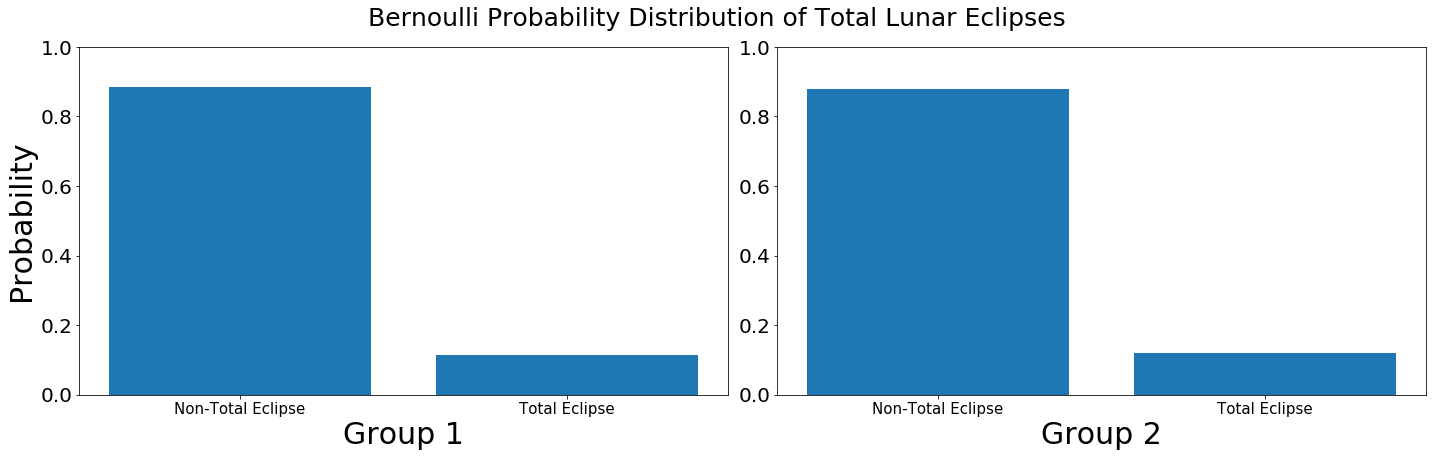

In [407]:
_ = plt.rcParams['figure.figsize'] = 20,6 

#Plot on the left
_ = plt.subplot(1, 2, 1)
_ = plt.bar(['Non-Total Eclipse', 'Total Eclipse'], [1-lunar_p1,lunar_p1])
_ = plt.xlabel('Group 1', size=30)
_ = plt.ylabel('Probability',size=30)
_ = plt.ylim(0,1)

#plot on the right
_ = plt.subplot(1, 2, 2)
_ = plt.bar(['Non-Total Eclipse', 'Total Eclipse'], [1-lunar_p2,lunar_p2])
_ = plt.xlabel('Group 2',size=30)
_ = plt.ylim(0,1)

#edits the sizing of both plots
_ = plt.tight_layout()
_ = plt.rcParams['xtick.labelsize']=15
_ = plt.rcParams['ytick.labelsize']=20
_ = plt.suptitle('Bernoulli Probability Distribution of Total Lunar Eclipses',size = 25,y=1.05)
_ = plt.savefig('TotalLunar.png')
_ = plt.show()

In [408]:
#compute the standard deviations of each group 
lunar_sigma1 = np.sqrt(lunar_p1 * (1-lunar_p1) / lunar_n1)
lunar_sigma2 = np.sqrt(lunar_p2 * (1-lunar_p2) / lunar_n2)

#calculate the standard deviation difference 
lunar_sigma_diff = np.sqrt((lunar_sigma1**2) + (lunar_sigma2**2))

#for 95% confidence interval, we use the critical Z-value of 1.96
z_value = 1.96

#calculate the margin of error for frequential test: critical z-value * std
margin_error = z_value * lunar_sigma_diff
print ('margin of error = ', margin_error)

#Find a confidence interval of 95% for frequential test: mean +/- margin or error
conf_interval = np.array([-1, +1]) * margin_error
print('confidence interval = ',conf_interval)

#Print actual proportion difference
lunar_p1_p2 = lunar_p1-lunar_p2
print ('p_1 - p_2 = ', lunar_p1_p2)

margin of error =  0.011497635354007652
confidence interval =  [-0.01149764  0.01149764]
p_1 - p_2 =  -0.005601561775998562


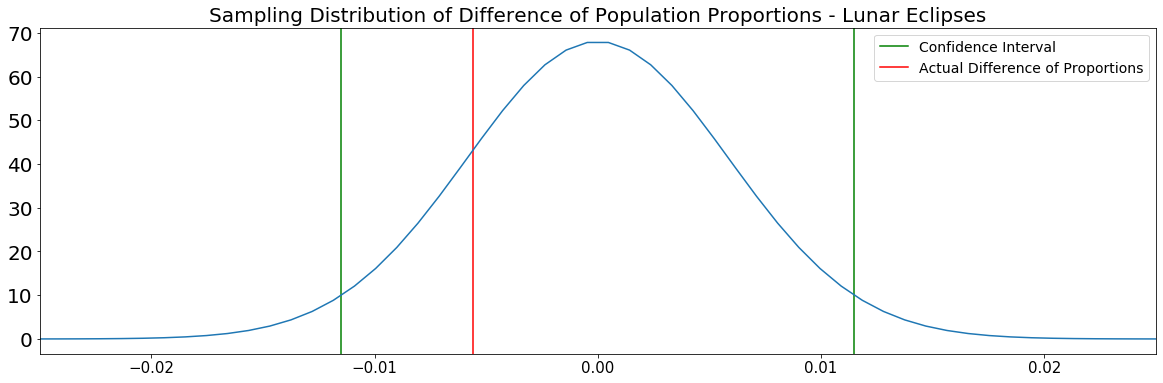

In [409]:
#create a plot displaying the sampling distribution for visual analysis
x= np.linspace(0-8*lunar_sigma_diff, 0+8*lunar_sigma_diff,100)
plt.axvline(x=lunar_distance, color='g', label ='Confidence Interval')
plt.axvline(x=-lunar_distance,color='g')
plt.axvline(x=lunar_p1 - lunar_p2,color='r',label='Actual Difference of Proportions')
plt.plot(x,stats.norm.pdf(x,0,lunar_sigma_diff))
plt.xlim(-0.025,0.025)
plt.title('Sampling Distribution of Difference of Population Proportions - Lunar Eclipses',size=20)
plt.legend(fontsize=14)
plt.savefig('LunarDist.png')
plt.show()

As seen above, the actual difference in proportions is inside the confidence interval range. Therefore we cannot reject the null hypothesis which states that the total lunar eclipse has the same probability of occuring in both month groups.

# Exploratory Data Analysis (EDA): Statistical Analysis Part 2 

This hypothesis test will be performed for both solar and lunar eclipses but with a smaller sample size of the past 400 years (1600-2000). Since it is known that most of the data has been calculated and not recorded, it would be interesting to test it on data where is was plausible for humans to have record of the eclipses. We will perform T-tests instead of Z-tests, since it is a small sample size of less than 10% of the parent poluation (np < 0.1) and we cannot assume the distribution is normal. 

HYPOTHESIS TEST: To test the hypothesis that total eclipse is not directly correlated to the months in the year, we will assume the following null and alternative hypothesis. 

𝐻𝑜  : The probability of total eclipse occuring is the same for Group 1 and Group 2. ( 𝑝1=𝑝2 )

𝐻𝑎  : The probability of total eclipse occuring is not the same for Group 1 and Group 2. ( 𝑝1≠𝑝2 )

------------------------------------THE END------------------------------------